In [1]:
from pyspark import SparkContext

In [2]:
from pyspark.sql.session import SparkSession

In [3]:
from pyspark.sql.functions import col,broadcast

In [4]:
from pyspark.sql import functions as F

In [5]:
from matplotlib import pyplot as plt

In [6]:
import pandas as pd

In [7]:
sc = SparkContext(master='local')

In [8]:
spark = SparkSession(sc)

In [193]:
import plotly.graph_objs as go

In [194]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [9]:
accident_info = spark.read.csv("hdfs://localhost:9000/files/accident/Accident_Information.csv",header=True,inferSchema=True)

In [10]:
vehicle_info = spark.read.csv("hdfs://localhost:9000/files/accident/Vehicle_Information.csv",header=True,inferSchema=True)

In [135]:
combinedDF = vehicle_info.join(accident_info,['Accident_Index'],'inner').drop(vehicle_info.Year)

In [12]:
combinedDF.filter((combinedDF['Sex_of_Driver'] == 'Male') & (col('Age_Band_of_Driver').like('26%'))).limit(10).show()

+--------------+--------------+---------------+--------------+---------------+-----------------+-------------------+-------------------+-----------+-------------------------------------------+--------------------+--------------------+---------+--------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+-------------------+-----------------------+------------------+--------------------------+-----------+-----+-------------------+--------------------+----+----------+------------------+--------------+---------------------+-----------------+--------------------+-------------------------+--------------------------+-------------------------+--------------------+----------+--------------------+---------------+-------------+------------------------+-----------------------+----------------

In [13]:
dataDF=combinedDF.select(combinedDF.Year,combinedDF.Number_of_Casualties).groupBy('Year').agg({'Number_of_Casualties' : 'count'}).orderBy('Year').toPandas()

In [14]:
year = dataDF['Year'].tolist()

casualties = dataDF['count(Number_of_Casualties)'].tolist()

Text(0.5,1,'Number of Casualties per Year')

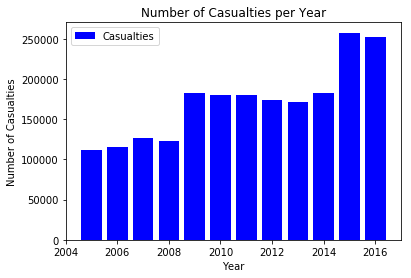

In [61]:
plt.bar(year,casualties,label="Casualties",color='b')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Number of Casualties")
plt.title("Number of Casualties per Year")

In [201]:
vehicle_ManoeuvreDF=combinedDF.select(combinedDF.Vehicle_Manoeuvre).groupBy('Vehicle_Manoeuvre').agg({'Vehicle_Manoeuvre' : 'count'}).orderBy('count(Vehicle_Manoeuvre)').limit(10).toPandas()

In [202]:
manoeuvre = vehicle_ManoeuvreDF['Vehicle_Manoeuvre'].tolist()

count_manoeuvre = vehicle_ManoeuvreDF['count(Vehicle_Manoeuvre)'].tolist()

In [203]:
pie_visual = go.Pie(labels=manoeuvre, values=count_manoeuvre, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Reason of Accident', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [145]:
genderDF=combinedDF.select('Accident_Index','Year','Age_Band_of_Driver','Sex_of_Driver').groupBy('Sex_of_Driver','Age_Band_of_Driver').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).toPandas()

In [179]:
maleDF=genderDF[genderDF['Sex_of_Driver']=='Male'].head(6)
male_age_band=maleDF['Age_Band_of_Driver'].tolist()
male_accident_count=maleDF['count(Accident_Index)'].tolist()

In [180]:
femaleDF=genderDF[genderDF['Sex_of_Driver']=='Female'].head(6)
female_age_band=femaleDF['Age_Band_of_Driver'].tolist()
female_accident_count=femaleDF['count(Accident_Index)'].tolist()

In [184]:
trace1 = go.Bar(
    x=male_age_band,
    y=male_accident_count,
    name='Male Drivers',
    marker=dict(color='#f259d6'),
    opacity=0.8
)
trace2 = go.Bar(
    x=female_age_band,
    y=female_accident_count,
    name='Female Drivers',
    marker=dict(color='#f7bb31'),
    opacity=0.8
)
data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    legend=dict(dict(x=-.1, y=1.2)),
    margin=dict(b=120),
    title = 'Accidents categorized by gender',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

plt.show()

In [191]:
journey_purposeDF=combinedDF.select('Accident_Index','Journey_Purpose_of_Driver').groupBy('Journey_Purpose_of_Driver').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).toPandas()

In [190]:
journey_label=journey_purposeDF['Journey_Purpose_of_Driver'].tolist()
accident_count=journey_purposeDF['count(Accident_Index)'].tolist()
accident_count

[4298, 14763, 21792, 32965, 202525, 391713, 555726, 834626]

In [199]:
pie_visual = go.Pie(labels=journey_label, values=accident_count, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Journey Purpose while Accident Happened', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [205]:
accident_roadDF=combinedDF.select('Accident_Index','Road_Type').groupBy('Road_Type').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).toPandas()

In [206]:
road_type=accident_roadDF['Road_Type'].tolist()
accident_count=accident_roadDF['count(Accident_Index)'].tolist()

In [207]:
pie_visual = go.Pie(labels=road_type, values=accident_count, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Journey Purpose while Accident Happened', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [216]:
day_of_week_DF=combinedDF.select('Accident_Index','Day_of_Week').groupBy('Day_of_Week').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).toPandas()

In [218]:
weekday_name=day_of_week_DF['Day_of_Week'].tolist()
accident_count=day_of_week_DF['count(Accident_Index)'].tolist()

In [219]:
pie_visual = go.Pie(labels=weekday_name, values=accident_count, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Accidents categorized in Day of Week', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [227]:
vehicle_makerDF=combinedDF.select('Accident_Index','make').groupBy('make').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).limit(10).toPandas()

In [228]:
maker_name=vehicle_makerDF['make'].tolist()
accident_count=vehicle_makerDF['count(Accident_Index)'].tolist()

In [229]:
pie_visual = go.Pie(labels=maker_name, values=accident_count, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Accidents categorized in Day of Week', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [234]:
vehicleDF= combinedDF.select(combinedDF.Accident_Index,combinedDF.Age_Band_of_Driver,combinedDF.Age_of_Vehicle,combinedDF.Journey_Purpose_of_Driver,combinedDF.make,combinedDF.model, combinedDF.Junction_Location).filter((col('Age_Band_of_Driver').like('26%')))

accidentDF= combinedDF.select(combinedDF.Accident_Index,combinedDF.Date,combinedDF.Day_of_Week,combinedDF.Road_Type,combinedDF.Speed_limit,combinedDF.Year).filter(combinedDF['Day_of_Week'] == 'Tuesday').orderBy('Year',ascending=True)

''' Performing Left Outer Join on '''

filteredDF = accidentDF.join(vehicleDF,['Accident_Index'], "left_outer").drop(accidentDF.Year)

In [236]:
'''Performing Broadcast Join'''

broadcastDF = combinedDF.join(filteredDF,['Accident_Index'])

df1 = combinedDF.alias('df1')
df2 = filteredDF.alias('df2')

drop_list = [c for c in df1.columns if c in df2.columns]
for col in drop_list:
    broadcastDF = broadcastDF.drop(df2[col])

broadcastDF.show()

+--------------+--------------------+--------------+---------------------+-----------------+--------------------+-------------------------+--------------------------+-------------------------+--------------------+----------------+--------------------+---------------+-------------+------------------------+-----------------------+---------------------------+--------------------------------+--------------------+-----------------+--------------------+---------------------------+--------------------+--------------+---------------+--------------+---------------+-----------------+-------------------+-------------------+-----------+-------------------------------------------+--------------------+--------------------+---------+--------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+---